In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')
%matplotlib inline

In [2]:
'''Функция приведения пустых значений к единому виду'''
def change_empty_metrics(df_col):
    return df_col.apply(lambda x: None if str(x).strip() == '' else None if pd.isnull(x)
                                     else None if str(x) == 'nan' else x)

'''Функция определения квартилей и межквартильного размаха, наличия выбросов'''
def presence_of_emissions(df_col, output_flag = False):
    Q1 = df_col.quantile(0.25)
    Q3 = df_col.quantile(0.75)
    IQR = Q3 - Q1
    if output_flag:
        result = len(df_col[df_col.between(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)]) < len(df_col.dropna())
        if result:
            print('В данных содержатся выбросы')
        else:
            print('В данных отсутствуют выбросы')
        return result
    else:
        print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {}, Границы выбросов: [{f}, {l}].'
          .format(Q1, Q3, IQR, f = Q1 - 1.5 * IQR, l = Q3 + 1.5 * IQR))
        return Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    
'''Тест Стьюдента'''
def get_stat_dif(column):
    cols = stud.loc[:,column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:,column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:,column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break



def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [3]:
display(stud.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [4]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Видно, что dataframe содержит пустые значения

In [5]:
stud['traveltime'].value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

Поскрльку показатель failures может быть равен нулю и при отсутствии неудач и при их большом количестве, а так же неописанный показатель "studytime, granular", равный studytime * (-3), уберем показатели из датасета

In [6]:
stud.drop(['failures', 'studytime, granular'], inplace = True, axis = 1)

In [7]:
display(stud.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


**Проведем первичный анализ показателя Score**

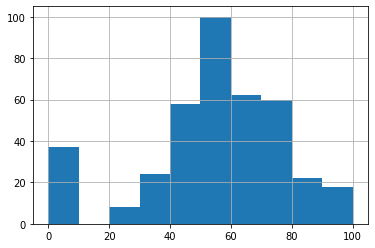

In [8]:
stud = stud[stud.score.notna()] # Поскольку score является результатом для будущей модели, 
#необходимо удалить пустые значения из таблицы 
stud.score.hist() # Построим гисторграмму распределения оценок

In [9]:
presence_of_emissions(stud.score, True) #Определим квартили и межвартильный интервал 

В данных отсутствуют выбросы


False

Функция определила, что выбросов нет, однако по гистограмме видно, что значений в промежутке [0,10] слишком много.
Можно предположить, что данные содержат ошибки или информацию о студентах, которые не явились на экзамен.
Поэтому предлагается удалить данные значения из базы


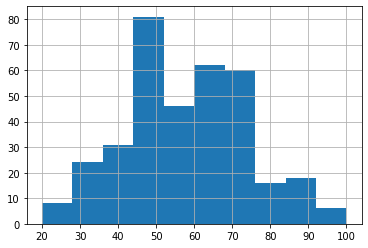

In [10]:
stud = stud[stud.score >= 10]
stud.score.hist() # Построим гисторграмму распределения оценок

**Проверка числовых показателей на наличие выбросов**

In [11]:
#Cоздадим списки числовых и номинативных показателей 
numerical_columns = list(filter(lambda x: stud[x].dtype != 'object', list(stud.columns)))
nominative_columns = list(filter(lambda x: stud[x].dtype == 'object', list(stud.columns)))
print('Числовые показатели \n{}'.format(numerical_columns))
print('Номинативые показатели \n{}'.format(nominative_columns))

Числовые показатели 
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']
Номинативые показатели 
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [12]:
#Уберем строки с ошибками в показателях
numerical_columns_0_5 = ['Medu', 'Fedu']
for column in numerical_columns_0_5:
    stud = stud[stud[column].between(0,5)]

numerical_columns_1_4 = ['traveltime', 'studytime']
for column in numerical_columns_1_4:
    stud = stud[stud[column].between(1,4)]
    
numerical_columns_1_5 = ['famrel', 'freetime', 'goout', 'health']
for column in numerical_columns_1_5:
    stud = stud[stud[column].between(1,5)]

Проверка показателя age
В данных содержатся выбросы


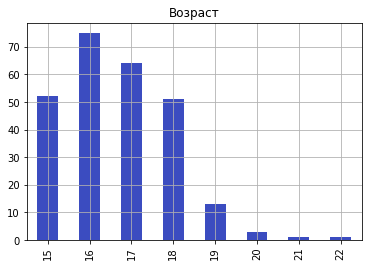

In [13]:
#Проверим наличие выбросов показтеля age
print('Проверка показателя {}'.format('age'))
presence_of_emissions(stud['age'], True)
stud['age'].value_counts().sort_index().plot(kind = 'bar', grid = True, colormap = 'coolwarm', title = 'Возраст')

Хотя программа и обнаружила выбросы, на самом деле они отстуствуют

Проверка показателя absences
В данных содержатся выбросы


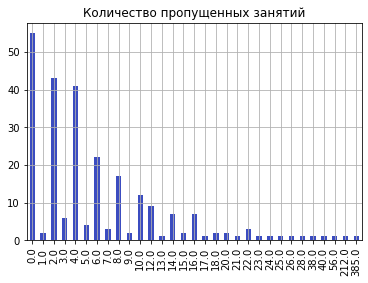

In [14]:
#Проверим наличие выбросов показтеля absences
print('Проверка показателя {}'.format('absences'))
presence_of_emissions(stud['absences'], True)
stud['absences'].value_counts().sort_index().plot(kind = 'bar', grid = True, colormap = 'coolwarm', 
                                                  title = 'Количество пропущенных занятий')

25-й перцентиль: 2.0, 75-й перцентиль: 8.0, IQR: 6.0, Границы выбросов: [-7.0, 17.0].


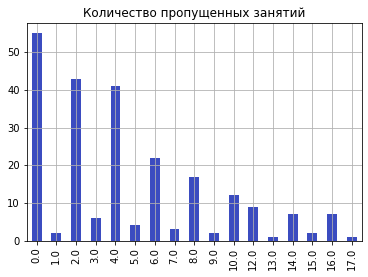

In [15]:
#Удалим выбросы
scope_min, scope_max = presence_of_emissions(stud['absences'])
stud = stud[stud.absences.between(scope_min, scope_max)]
stud['absences'].value_counts().sort_index().plot(kind = 'bar', grid = True, colormap = 'coolwarm', 
                                                  title = 'Количество пропущенных занятий')

In [16]:
#Проверим получившийся датасет
stud.reset_index(inplace = True)
stud.info()
display(stud)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       234 non-null    int64  
 1   school      234 non-null    object 
 2   sex         234 non-null    object 
 3   age         234 non-null    int64  
 4   address     227 non-null    object 
 5   famsize     221 non-null    object 
 6   Pstatus     211 non-null    object 
 7   Medu        234 non-null    float64
 8   Fedu        234 non-null    float64
 9   Mjob        226 non-null    object 
 10  Fjob        217 non-null    object 
 11  reason      222 non-null    object 
 12  guardian    211 non-null    object 
 13  traveltime  234 non-null    float64
 14  studytime   234 non-null    float64
 15  schoolsup   226 non-null    object 
 16  famsup      211 non-null    object 
 17  paid        211 non-null    object 
 18  activities  223 non-null    object 
 19  nursery     224 non-null    o

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,course,mother,1.0,2.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
230,391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
231,392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
232,393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,no,no,no,NaN,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


**Проведем анализ номинативных показателей**

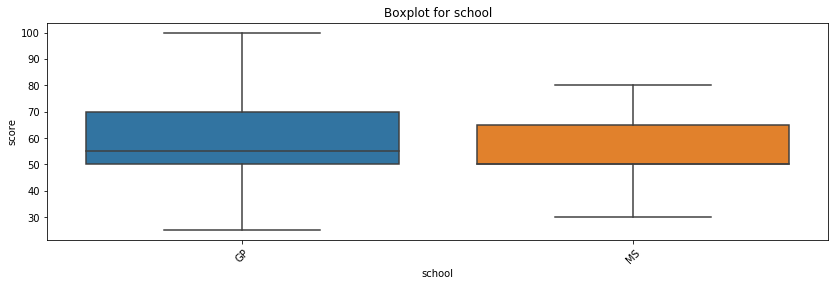

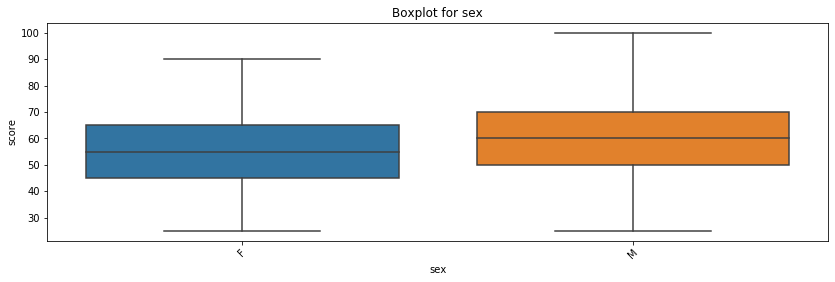

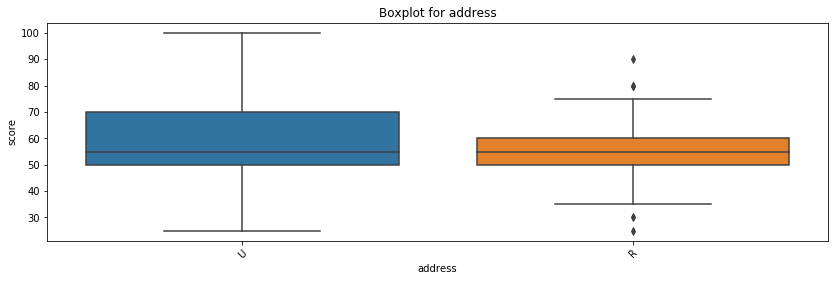

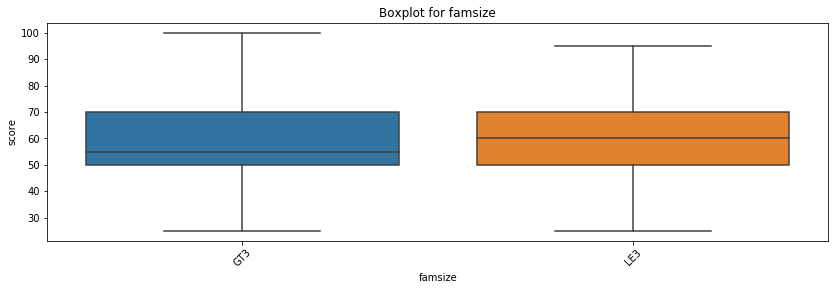

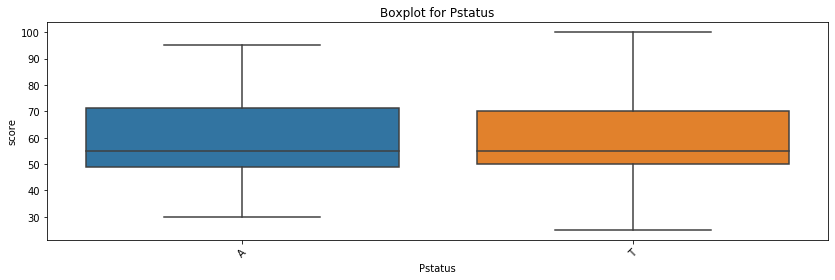

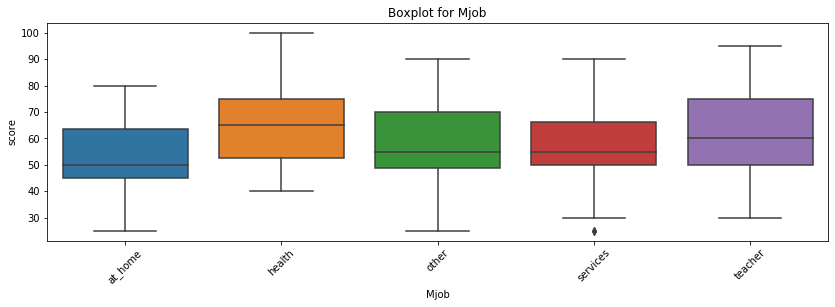

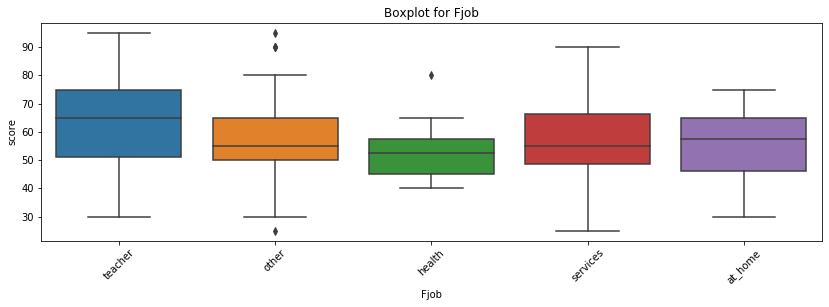

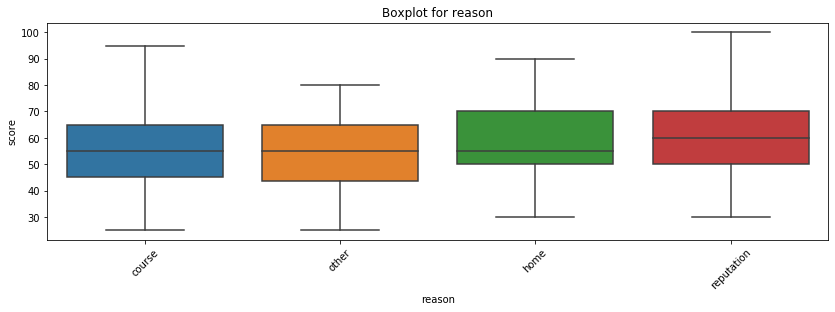

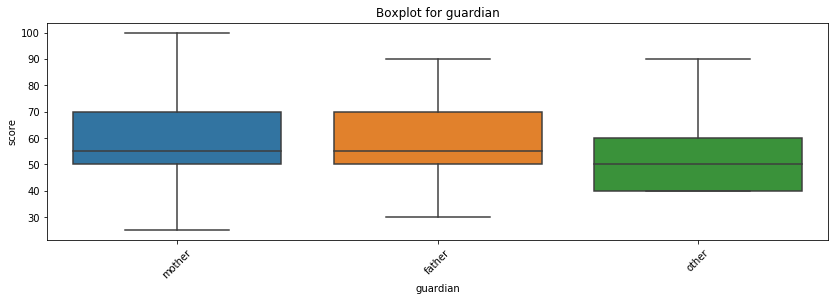

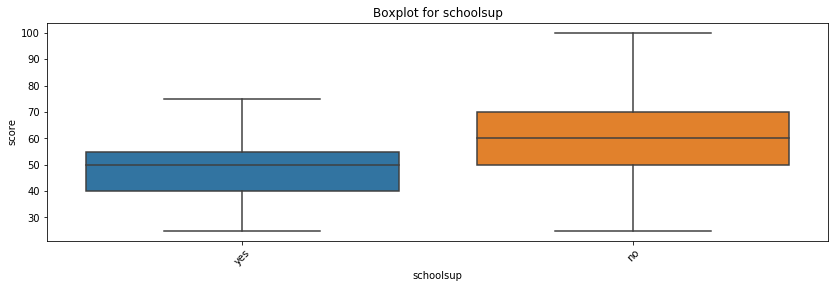

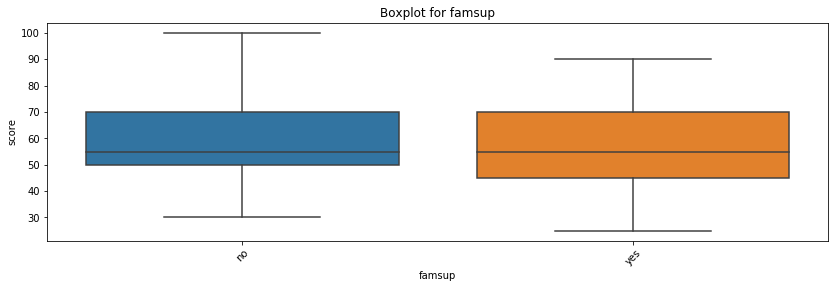

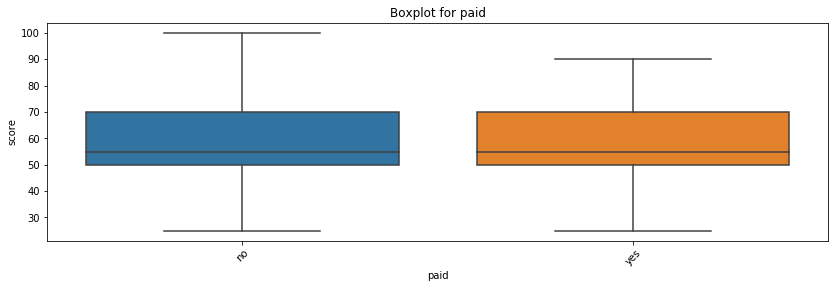

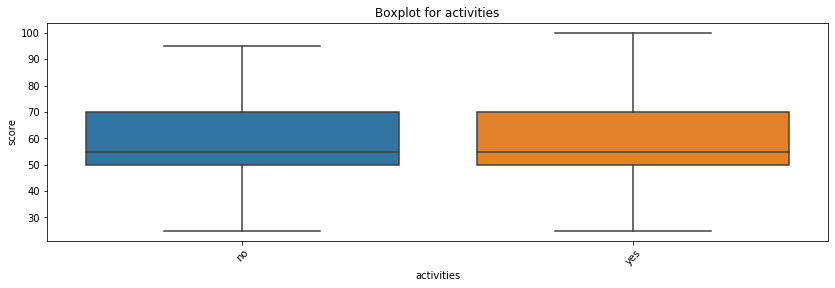

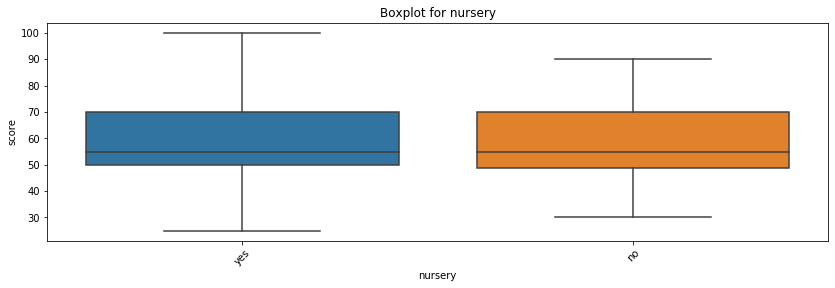

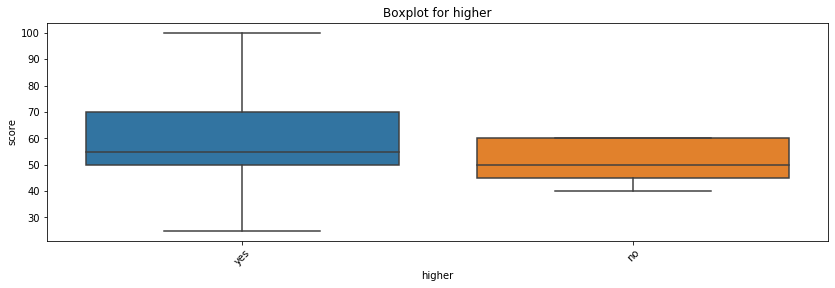

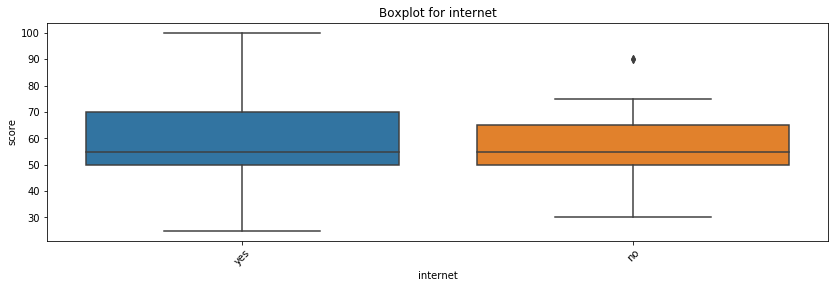

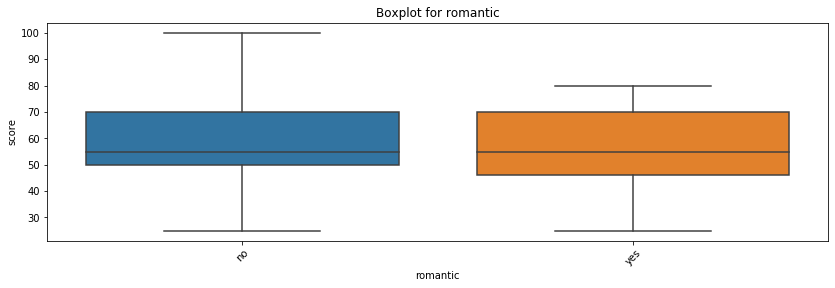

In [17]:
for column in nominative_columns:
    get_boxplot(column)

In [18]:
for col in nominative_columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки schoolsup


**Проведем анализ числовых показателей**

In [19]:
stud.corr()

,index,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,absences,score
index,1.000000,0.735054,-0.173585,-0.111632,0.206351,-0.013364,-0.075144,-0.048593,0.034453,-0.031185,0.022064,0.000716
age,0.735054,1.000000,-0.159896,-0.160613,0.084237,-0.049300,0.043272,0.005343,0.068370,-0.006721,0.146540,-0.155601
Medu,-0.173585,-0.159896,1.000000,0.624359,-0.162492,0.074814,-0.020455,-0.007926,0.052832,-0.076733,0.130077,0.143797
Fedu,-0.111632,-0.160613,0.624359,1.000000,-0.181969,-0.018630,-0.011610,-0.039972,0.024407,-0.005122,0.008477,0.072395
traveltime,0.206351,0.084237,-0.162492,-0.181969,1.000000,-0.106206,-0.076490,0.033671,0.002900,0.022720,-0.045216,-0.064816
studytime,-0.013364,-0.049300,0.074814,-0.018630,-0.106206,1.000000,0.045014,-0.156678,-0.059434,-0.100280,-0.026855,0.130744
famrel,-0.075144,0.043272,-0.020455,-0.011610,-0.076490,0.045014,1.000000,0.171988,0.017117,0.163223,-0.071226,0.055280
freetime,-0.048593,0.005343,-0.007926,-0.039972,0.033671,-0.156678,0.171988,1.000000,0.308665,0.135811,0.095613,-0.009789
goout,0.034453,0.068370,0.052832,0.024407,0.002900,-0.059434,0.017117,0.308665,1.000000,0.054669,0.133447,-0.197191
health,-0.031185,-0.006721,-0.076733,-0.005122,0.022720,-0.100280,0.163223,0.135811,0.054669,1.000000,-0.019219,-0.022785


Нет сильнокоррелированных показателей датасета

**Датасет со значимыми показателями**

In [20]:
stud_for_model = stud[['age', 'sex', 'Medu', 'Fedu', 'traveltime', 'studytime', 'schoolsup', 'famrel', 'freetime', 'goout', 
                       'health', 'absences', 'score']]

In [21]:
display(stud_for_model)

,age,sex,Medu,Fedu,traveltime,studytime,schoolsup,famrel,freetime,goout,health,absences,score
0,18,F,4.0,4.0,2.0,2.0,yes,4.0,3.0,4.0,3.0,6.0,30.0
1,17,F,1.0,1.0,1.0,2.0,no,5.0,3.0,3.0,3.0,4.0,30.0
2,15,F,1.0,1.0,1.0,2.0,yes,4.0,3.0,2.0,3.0,10.0,50.0
3,15,F,4.0,2.0,1.0,3.0,no,3.0,2.0,2.0,5.0,2.0,75.0
4,16,F,3.0,3.0,1.0,2.0,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,18,F,3.0,1.0,1.0,2.0,no,4.0,3.0,4.0,1.0,0.0,40.0
230,17,M,3.0,1.0,2.0,1.0,no,2.0,4.0,5.0,2.0,3.0,80.0
231,21,M,1.0,1.0,1.0,1.0,NaN,5.0,5.0,3.0,3.0,3.0,35.0
232,18,M,3.0,2.0,3.0,1.0,no,4.0,4.0,1.0,5.0,0.0,50.0
